In [2]:
import peasy as ps
from itertools import compress
from collections import namedtuple
import seaborn as sns
import matplotlib as mpl
from enum import Enum
import pandas as pd
from sklearn.datasets import make_blobs
from dataclasses import field

In [3]:
line1 = ps.Line([1, 2, 4.0, 1], hello=1.3, label="bole", ub=[2, 3, 9, 2.3], lb=[0, 1, 2, 0])
line2 = ps.Line([1.0, 8, 5.0, 4], hello=5, label="mira")
line3 = ps.Line(['mine', 'yours', 'theirs', 'here'], [2.0, 7, 3.0, 3], hello=1.6, label="kore")
line4 = ps.Line(['mine', 'yours', 'here', 'theirs'], [5.0, 2, 1.0, 3], hello=2.6, label="mine")
lines = []
dots = sns.load_dataset("dots")
for df in dots[(dots['align']=='dots') & (dots['choice'] == 'T1')].groupby('coherence'):
    line = ps.Line(df[1].time.tolist(), df[1].firing_rate.tolist(), coherence=df[0])
    lines.append(line)

In [4]:
dat, label = make_blobs(1000, centers=5)
scatter = ps.Scatter(dat, dots=label.astype(str))

In [5]:
colony = ps.Colony(legend=ps.Legend(outside=True))

In [17]:
artist = colony.new_artist(multi=True)

artist.lineplot(line1, line2, hue="label", shade_ub='ub', size="label", hue_order=["mira", "bole"])
artist.scatterplot(scatter, hue='dots')
artist.lineplot(*lines, hue="coherence")
# artist.lineplot(line1, line2, hue="hello", xlabel="UMAP1", ylabel="There", shade_ub='ub', shade_lb='lb')
# artist.lineplot(line1, line2, hue="label", size="label", xlabel="bole", title="mime")
# artist.lineplot(line3, line4, hue="label")

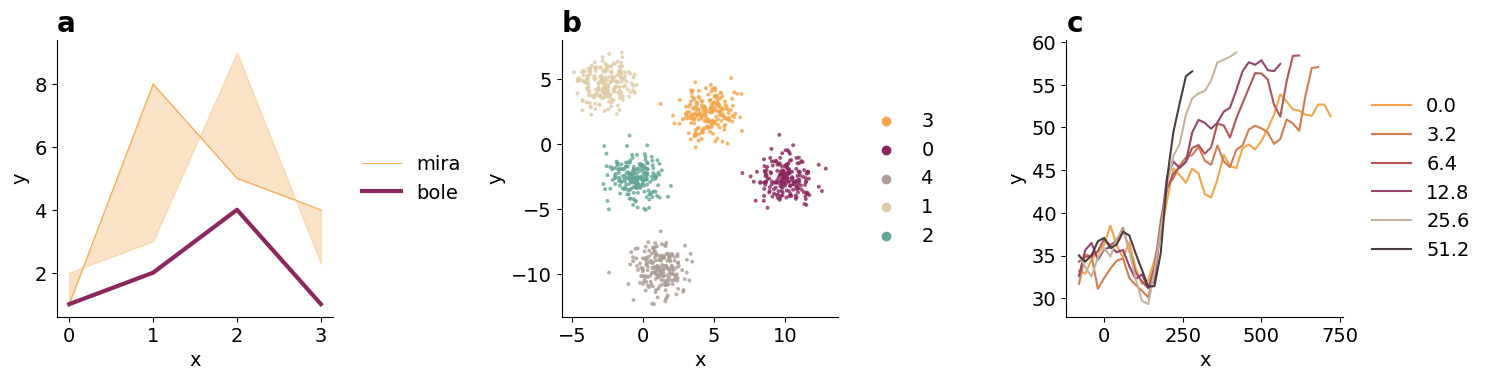

In [18]:
axes = artist.show(mosaic=[[0, 1, 2]])
# axes = artist.show()